# Projektarbeit Gruppe 2: Gesundheitsdaten

https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

In [2]:
# Import der benötigten Bibliotheken

import pandas as pd
import numpy as np
import os


# Anforderungen 4

Feature Engineering & Zeitreihen

In [38]:
# Dataset laden und die ersten 5 Zeilen ausgeben:
path = str(os.getcwd()).replace("\Projektarbeit\Aufgaben", "")

dataset = pd.read_csv(path + '\smoking_drinking_dataset_V0.csv')
body_mass_index = dataset["weight"].astype(np.float64) / ((dataset["height"].astype(np.float64) / 100) * (dataset["height"].astype(np.float64) / 100))

dataset["BMI"] = body_mass_index
dataset_renamed = dataset.rename(columns={'sex': 'Geschlecht', 'age': 'Alter', 'height': 'Größe', 'weight': 'Gewicht', 'waistline': 'Taille', 'sight_left': 'Sehkraft_links', 'sight_right': 'Sehkraft_rechts', 'hear_left': 'Hörkraft_links', 'hear_right': 'Hörkraft_rechts', 'SBP': 'Systolischer Blutdruck', 'DBP': 'Diastolischer Blutdrock', 'BLDS': 'Blutleckdetektor', 'tot_chole': 'Totale Cholesterin', 'HDL_chole': 'HDL_Cholesterin', 'LDL_chole': 'LDL_Cholesterin', 'triglyceride': 'Triglycerid', 'hemoglobin': 'Hemoglobin', 'urine_protein': 'Urin_Proteine', 'serum_creatinine': 'Serum_Kreatinin', 'SGOT_AST': 'SGOT_AST', 'SGOT_ALT': 'SGOT_ALT', 'gamma_GTP': 'gamma_GTP', 'SMK_stat_type_cd': 'Raucher_Status', 'DRK_YN': 'Trinker', 'BMI': 'Body-Mass-Index'})
column_names = dataset_renamed.columns.values.tolist()
print(column_names)

dataset_redordered = dataset_renamed.sort_values(by=['Alter'], ascending=True)

dataset = dataset_redordered

dataset.head()


['Geschlecht', 'Alter', 'Größe', 'Gewicht', 'Taille', 'Sehkraft_links', 'Sehkraft_rechts', 'Hörkraft_links', 'Hörkraft_rechts', 'Systolischer Blutdruck', 'Diastolischer Blutdrock', 'Blutleckdetektor', 'Totale Cholesterin', 'HDL_Cholesterin', 'LDL_Cholesterin', 'Triglycerid', 'Hemoglobin', 'Urin_Proteine', 'Serum_Kreatinin', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'Raucher_Status', 'Trinker', 'Body-Mass-Index']


,Geschlecht,Alter,Größe,Gewicht,Taille,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,Triglycerid,Hemoglobin,Urin_Proteine,Serum_Kreatinin,SGOT_AST,SGOT_ALT,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index
611351,Male,20,180,65,72.0,1.5,1.5,1.0,1.0,110.0,...,60.0,13.9,1.0,1.1,22.0,19.0,14.0,1.0,Y,20.061728
513844,Male,20,175,65,75.0,0.8,0.8,1.0,1.0,153.0,...,2527.0,18.3,3.0,0.9,16.0,13.0,37.0,1.0,Y,21.224490
356547,Male,20,170,65,77.0,0.9,0.9,1.0,1.0,129.0,...,59.0,15.0,1.0,0.9,19.0,12.0,11.0,1.0,N,22.491349
665411,Female,20,155,45,69.0,0.9,1.0,1.0,1.0,111.0,...,35.0,13.9,1.0,0.7,17.0,6.0,14.0,1.0,N,18.730489
845242,Male,20,170,65,78.0,0.9,1.5,1.0,1.0,108.0,...,37.0,16.2,1.0,1.0,21.0,16.0,17.0,1.0,N,22.491349


In [5]:
dataset.to_csv('data_prep.csv', index=False)

One Hot Encoding --> Einordung des Blutdrucks nach WHO
https://www.veroval.info/de-de/wissen/blutdruck/wissenswertes-ueber-bluthochdruck

Laut WHO und anderer führender Gesundheitsorganisationen werden die systolischen und diastolischen Blutdruckwerte in sechs Kategorien1 unterteilt: optimal (bis zu 119 mmHg systolisch und bis zu 79 mmHg diastolisch), 
normal (120-129 mmHg systolisch und/oder 80-84 mmHg diastolisch), 
Grenzwert normal (130-139 mmHg systolisch und/oder 85-89 mmHg diastolisch), 
Hypertonie Grad 1 (140-159 mmHg systolisch und/oder 90-99 mmHg diastolisch), 
Hypertonie Grad 2 (160-179 mmHg systolisch und/oder 100-109 mmHg diastolisch) und 
Hypertonie Grad 3 (> 180 mmHg systolisch und/oder > 110 mmHg diastolisch).

In [39]:
dataset["BD_optimal"] = dataset['Systolischer Blutdruck']
dataset["BD_normal"] = dataset['Systolischer Blutdruck']
dataset["BD_Grenzwert_normal"] = dataset['Systolischer Blutdruck']
dataset["BD_Hypertonie Grad 1"] = dataset['Systolischer Blutdruck']
dataset["BD_Hypertonie Grad 2"] = dataset['Systolischer Blutdruck']
dataset["BD_Hypertonie Grad 3"] = dataset['Systolischer Blutdruck']



In [40]:
dataset["BD_optimal"] = (dataset['Systolischer Blutdruck'] <= 119) & (dataset['Diastolischer Blutdrock'] <= 79)
dataset["BD_optimal"] = dataset["BD_optimal"].astype(int) 

In [41]:
dataset["BD_normal"] = (dataset['Systolischer Blutdruck'] >= 120) & (dataset['Systolischer Blutdruck'] < 130) & (dataset['Diastolischer Blutdrock'] >= 80) & (dataset['Diastolischer Blutdrock'] < 85)
dataset["BD_normal"] = dataset["BD_normal"].astype(int) 

dataset["BD_Grenzwert_normal"] = (dataset['Systolischer Blutdruck'] >= 130) & (dataset['Systolischer Blutdruck'] < 140) & (dataset['Diastolischer Blutdrock'] >= 85) & (dataset['Diastolischer Blutdrock'] < 90)
dataset["BD_Grenzwert_normal"] = dataset["BD_Grenzwert_normal"].astype(int) 

dataset["BD_Hypertonie Grad 1"] = (dataset['Systolischer Blutdruck'] >= 140) & (dataset['Systolischer Blutdruck'] < 160) & (dataset['Diastolischer Blutdrock'] >= 90) & (dataset['Diastolischer Blutdrock'] < 100)
dataset["BD_Hypertonie Grad 1"] = dataset["BD_Hypertonie Grad 1"].astype(int) 

dataset["BD_Hypertonie Grad 2"] = (dataset['Systolischer Blutdruck'] >= 160) & (dataset['Systolischer Blutdruck'] < 180) & (dataset['Diastolischer Blutdrock'] >= 100) & (dataset['Diastolischer Blutdrock'] < 110)
dataset["BD_Hypertonie Grad 2"] = dataset["BD_Hypertonie Grad 2"].astype(int) 

dataset["BD_Hypertonie Grad 3"] = (dataset['Systolischer Blutdruck'] >= 180) & (dataset['Diastolischer Blutdrock'] >= 110)
dataset["BD_Hypertonie Grad 3"] = dataset["BD_Hypertonie Grad 3"].astype(int) 

In [42]:
dataset['Trinker'] = dataset['Trinker'] == 'Y'

dataset.head()



,Geschlecht,Alter,Größe,Gewicht,Taille,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,gamma_GTP,Raucher_Status,Trinker,Body-Mass-Index,BD_optimal,BD_normal,BD_Grenzwert_normal,BD_Hypertonie Grad 1,BD_Hypertonie Grad 2,BD_Hypertonie Grad 3
611351,Male,20,180,65,72.0,1.5,1.5,1.0,1.0,110.0,...,14.0,1.0,True,20.061728,1,0,0,0,0,0
513844,Male,20,175,65,75.0,0.8,0.8,1.0,1.0,153.0,...,37.0,1.0,True,21.224490,0,0,0,0,0,0
356547,Male,20,170,65,77.0,0.9,0.9,1.0,1.0,129.0,...,11.0,1.0,False,22.491349,0,0,0,0,0,0
665411,Female,20,155,45,69.0,0.9,1.0,1.0,1.0,111.0,...,14.0,1.0,False,18.730489,1,0,0,0,0,0
845242,Male,20,170,65,78.0,0.9,1.5,1.0,1.0,108.0,...,17.0,1.0,False,22.491349,1,0,0,0,0,0


In [43]:
dataset['Male'] = dataset['Geschlecht'] == 'Male'
dataset['Female'] = dataset['Geschlecht'] == 'Female'


In [44]:
dataset['Male'] = dataset['Male'].astype(int)
dataset['Female'] = dataset['Female'].astype(int)
dataset['Trinker'] = dataset['Trinker'].astype(int)


In [45]:
dataset.head()

,Geschlecht,Alter,Größe,Gewicht,Taille,Sehkraft_links,Sehkraft_rechts,Hörkraft_links,Hörkraft_rechts,Systolischer Blutdruck,...,Trinker,Body-Mass-Index,BD_optimal,BD_normal,BD_Grenzwert_normal,BD_Hypertonie Grad 1,BD_Hypertonie Grad 2,BD_Hypertonie Grad 3,Male,Female
611351,Male,20,180,65,72.0,1.5,1.5,1.0,1.0,110.0,...,1,20.061728,1,0,0,0,0,0,1,0
513844,Male,20,175,65,75.0,0.8,0.8,1.0,1.0,153.0,...,1,21.224490,0,0,0,0,0,0,1,0
356547,Male,20,170,65,77.0,0.9,0.9,1.0,1.0,129.0,...,0,22.491349,0,0,0,0,0,0,1,0
665411,Female,20,155,45,69.0,0.9,1.0,1.0,1.0,111.0,...,0,18.730489,1,0,0,0,0,0,0,1
845242,Male,20,170,65,78.0,0.9,1.5,1.0,1.0,108.0,...,0,22.491349,1,0,0,0,0,0,1,0


Zeitreihe erstellen

In [46]:
dataset['Geburtsjahr'] = 2023 - dataset['Alter']

In [47]:
print(dataset['Geburtsjahr'].min())

1938


In [48]:
print(dataset['Geburtsjahr'].max())

2003


C:\Users\imanu\AppData\Local\Temp\ipykernel_24112\3794075842.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")


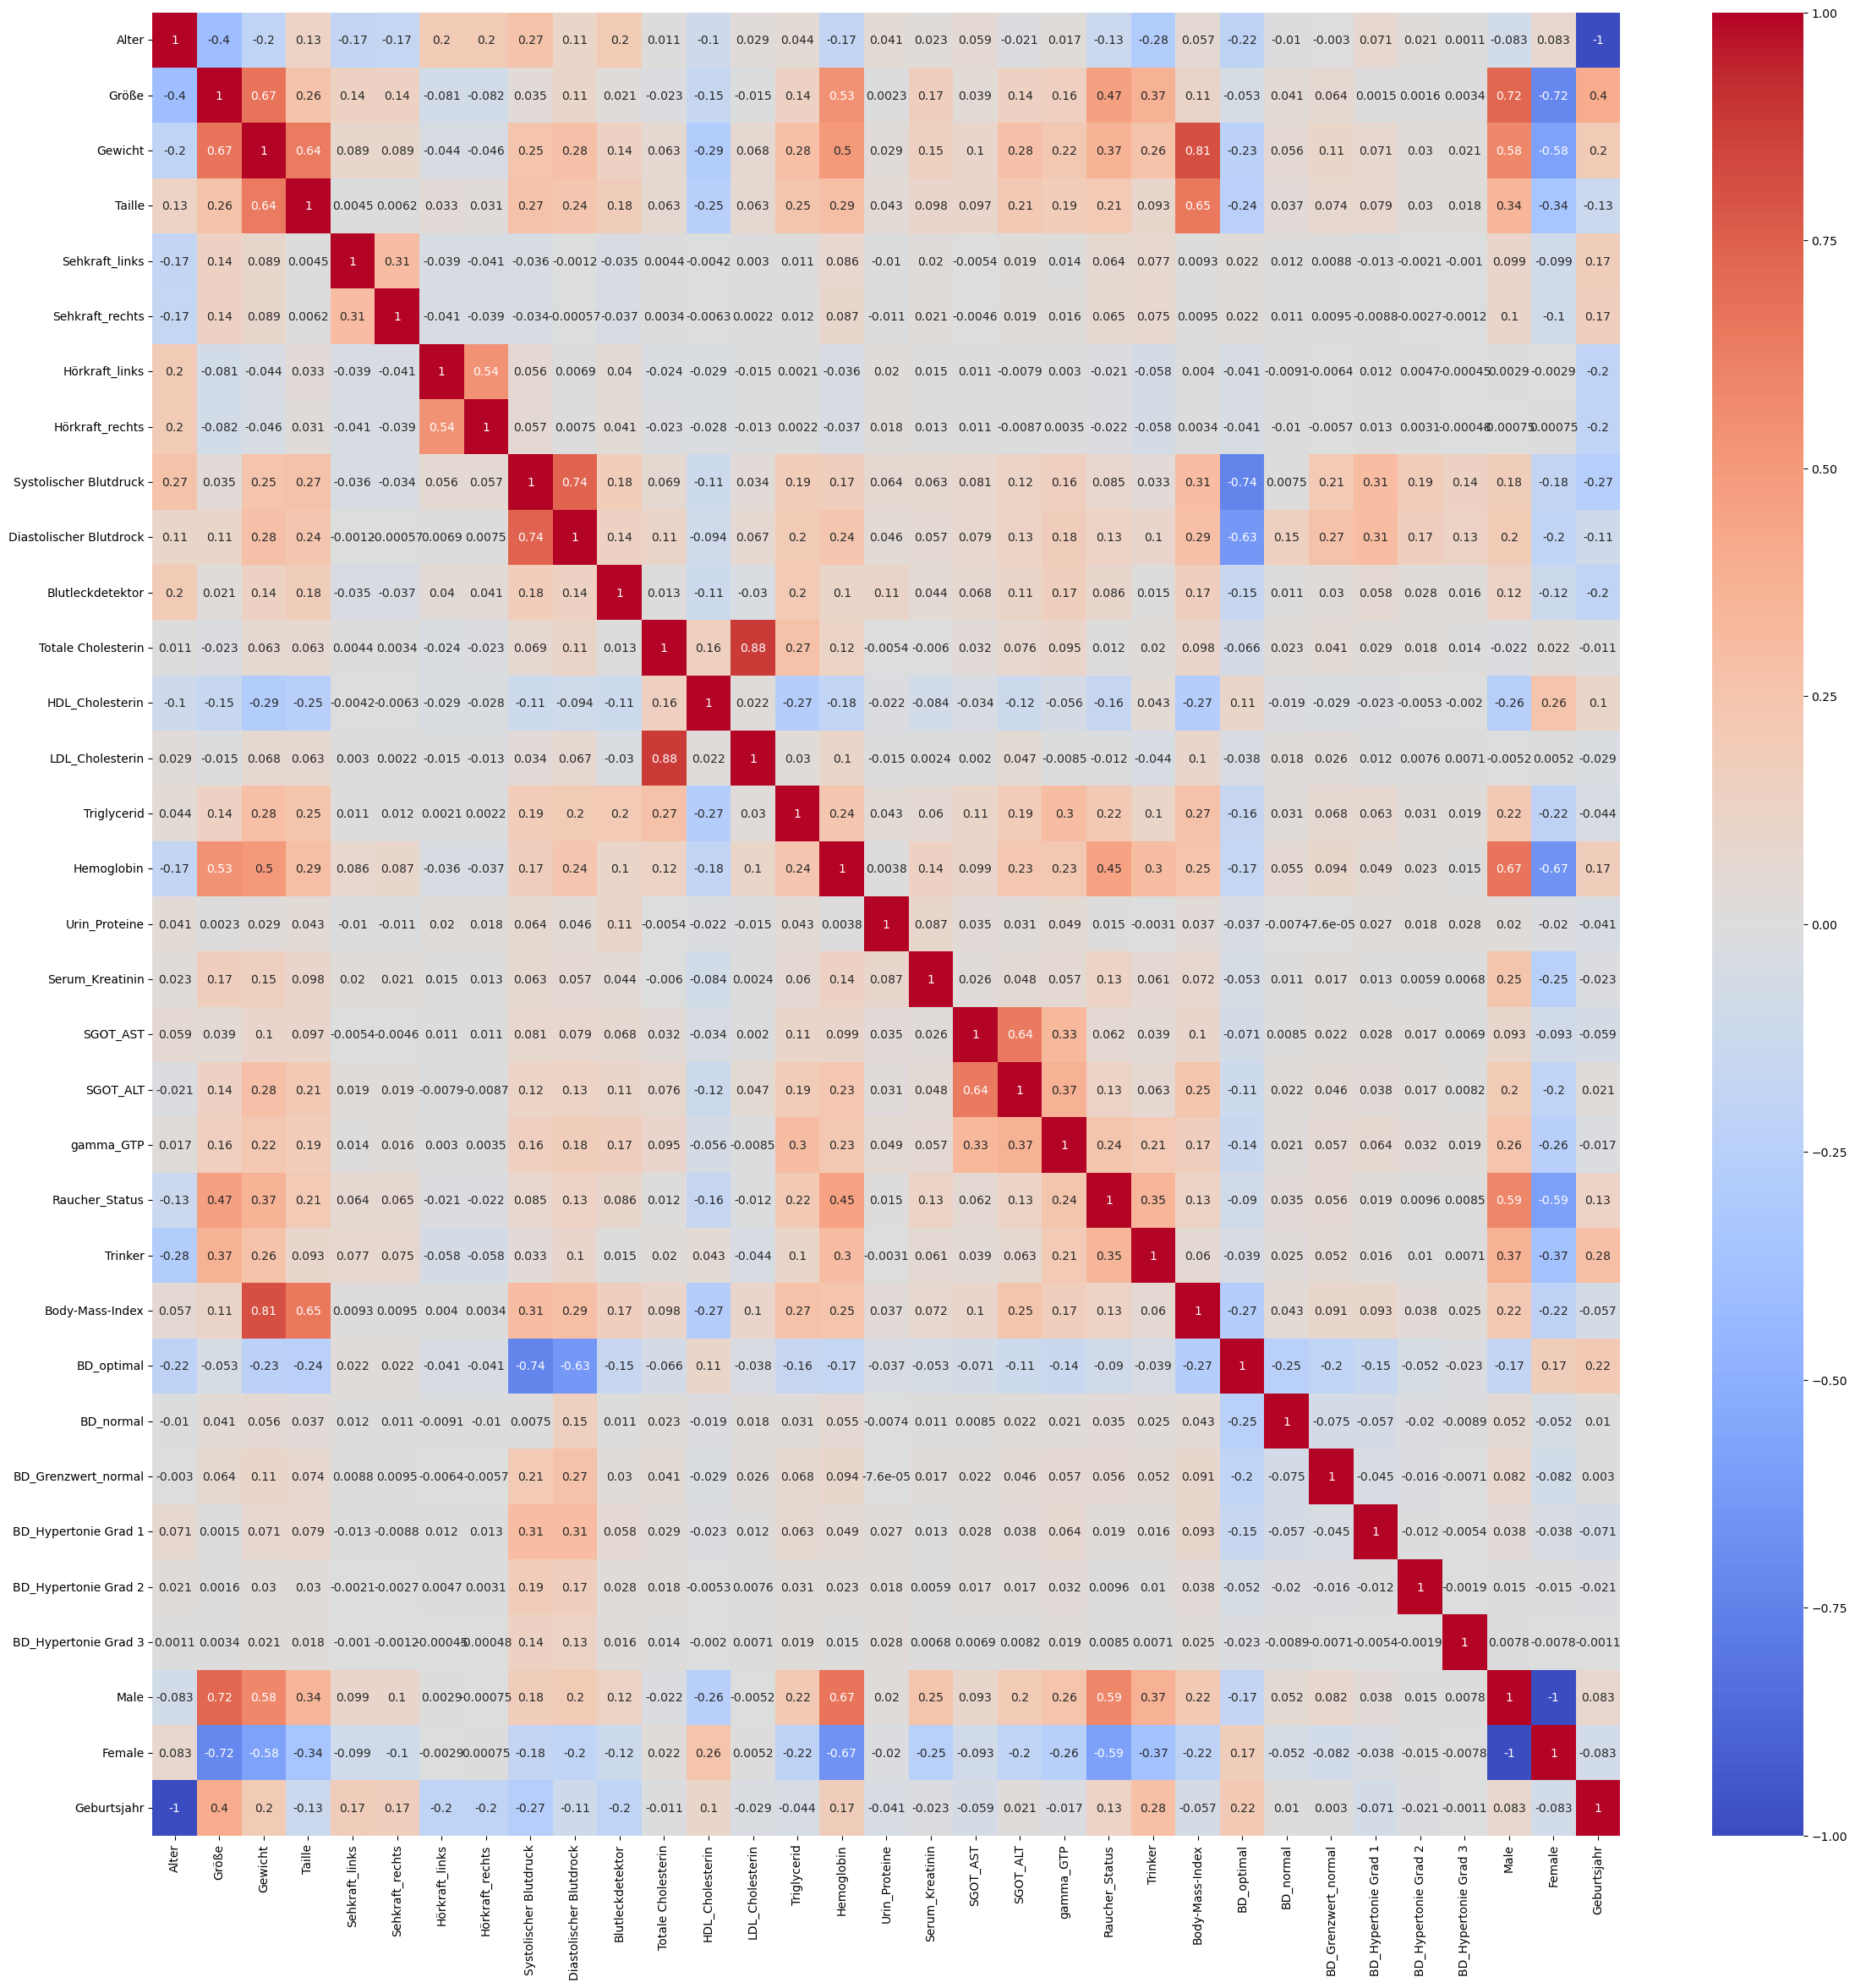

In [49]:

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(28, 28))
heatmap = sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm")

plt.show()


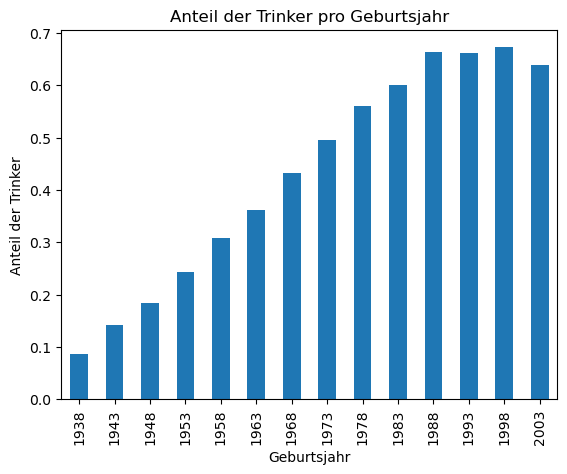

In [50]:
grouped = dataset.groupby('Geburtsjahr')['Trinker'].sum()

# Zählen Sie die Gesamtanzahl pro Geburtsjahr
total_by_year = dataset['Geburtsjahr'].value_counts()

# Berechnen Sie den Anteil der Trinker pro Geburtsjahr
anteil_trinker = grouped / total_by_year

# Erstellen Sie ein Balkendiagramm
anteil_trinker.plot(kind='bar', title='Anteil der Trinker pro Geburtsjahr')
plt.xlabel('Geburtsjahr')
plt.ylabel('Anteil der Trinker')
plt.show()







In [37]:
print(dataset['Trinker'].sum())

0
